There are 3 methods implemented here.

1. Non-Kernel Stochastic Gradient Descent
2. Kernel Stochastic Gradient Descent
3. Kernel Batch Gradient Descent

The training set are 20000 20D points which are  generated according to a normal distribution with mean = 0.0, std= 10.0
The label set are generated according to a normal distribution with mean =0.0, std =5.0

In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

Hyper-parameters

In [2]:
max_iteration = 50000
weight_decay = 0.01
NUM_EMPLOYEES = 10500
NUM_TRAIN = 10000
NUM_VAL = 500
NUM_FEATURES = 2
BANDWIDTH = 1

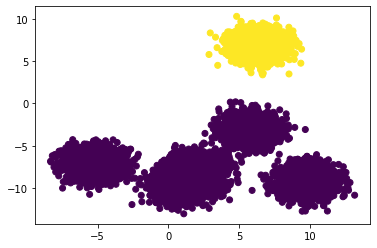

In [3]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot

data, label = make_blobs(n_samples=NUM_EMPLOYEES, n_features=NUM_FEATURES, centers=6)
label[label > 0] = -1
label[label == 0] = 1

# 绘制样本显示
plt.scatter(data[:, 0], data[:, 1], c=label)
plt.show()

# print(label)

Define the Training Set, Label Vector and Generate the Guassian Kernel according to the Training Set.

In [4]:
X = np.random.normal(loc=0.0, scale=10.0, size=(NUM_EMPLOYEES, NUM_FEATURES)) # the training set

Y = np.random.normal(loc=0.0, scale=5.0, size=NUM_EMPLOYEES) # the Label Vector
Y[Y > 0] = 1
Y[Y < 0] = -1

X = data
Y = label

In [5]:
# the BandWidth of Guassian Kernel.
square = np.sum(X ** 2, axis=1)
column_vec = square[:, np.newaxis]
row_vec = square[np.newaxis, :]

Gaussian_Kernel = np.exp(-1 * (-2 * X.dot(X.T) + column_vec + row_vec) / (2 * BANDWIDTH ** 2)) # the Gaussian Kernel 
print(Gaussian_Kernel[0,:])

# alpha = np.ones(NUM_TRAIN) # alpha recording the times that each sample has a non-zero loss

[1.00000000e+00 4.69326330e-11 2.94795053e-45 ... 5.71151444e-56
 8.35384830e-01 5.08713516e-13]


In [6]:
Gaussian_Kernel_train = Gaussian_Kernel[:NUM_TRAIN, :NUM_TRAIN]
Gaussian_Kernel_val = Gaussian_Kernel[NUM_TRAIN:, :NUM_TRAIN]

In [7]:
X_train = X[:NUM_TRAIN]
X_val = X[NUM_TRAIN:]
Y_train = Y[:NUM_TRAIN]
Y_val = Y[NUM_TRAIN:]

Non-kernel Method

In [8]:
loss_list = []
w = np.zeros(NUM_FEATURES)
for t in range(1, max_iteration + 1):
    eta = 1 / ( t * weight_decay )
    
    index = int(np.random.rand() * NUM_TRAIN)  # select one sample from training set randomly.
    
    x = X_train[index]
    y = Y_train[index]
    
    if 1 -y * x.dot(w) > 0:
        temp_w = w - w/t + eta *  y * x
    else:
        temp_w = w - w/t
    result = Y_train * X_train.dot(temp_w)
    mask = result < 0
    loss = LA.norm(w) + np.sum(result < 0) - np.sum(result[mask])
    if t == 1 or loss < loss_list[-1]:
        loss_list.append(loss)
        w = temp_w
    
    if t % 2000 == 0:
        print(" At Iter", t)
        print(" the training acc is: ", np.sum(Y_train * X_train.dot(w) > 0) / NUM_TRAIN)
        print(" the val acc is: ", np.sum(Y_val * X_val.dot(w) > 0 ) / NUM_VAL)

 At Iter 2000
 the training acc is:  1.0
 the val acc is:  1.0
 At Iter 4000
 the training acc is:  1.0
 the val acc is:  1.0
 At Iter 6000
 the training acc is:  1.0
 the val acc is:  1.0
 At Iter 8000
 the training acc is:  1.0
 the val acc is:  1.0
 At Iter 10000
 the training acc is:  1.0
 the val acc is:  1.0
 At Iter 12000
 the training acc is:  1.0
 the val acc is:  1.0
 At Iter 14000
 the training acc is:  1.0
 the val acc is:  1.0
 At Iter 16000
 the training acc is:  1.0
 the val acc is:  1.0
 At Iter 18000
 the training acc is:  1.0
 the val acc is:  1.0
 At Iter 20000
 the training acc is:  1.0
 the val acc is:  1.0
 At Iter 22000
 the training acc is:  1.0
 the val acc is:  1.0
 At Iter 24000
 the training acc is:  1.0
 the val acc is:  1.0
 At Iter 26000
 the training acc is:  1.0
 the val acc is:  1.0
 At Iter 28000
 the training acc is:  1.0
 the val acc is:  1.0
 At Iter 30000
 the training acc is:  1.0
 the val acc is:  1.0
 At Iter 32000
 the training acc is:  1.0
 t

[-43.9789671  153.67901912]


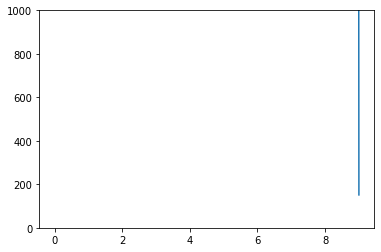

In [9]:
plt.plot(range(len(loss_list)), loss_list)
plt.ylim(0,1000)
# print(loss_list)
print(w)

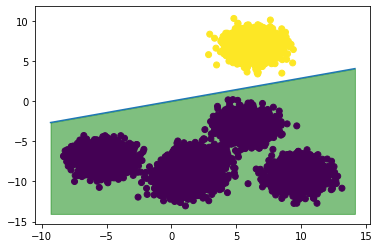

In [10]:
x_axis = np.linspace(np.min(data, axis = 0)[0]-1,np.max(data, axis = 0)[0]+1)
y_axis = w[0]/w[1] * x_axis * (-1)
y2_axis = min(np.min(data, axis = 0)[1]-1, y_axis[0])

plt.plot(x_axis, y_axis)
plt.fill_between(x_axis, y_axis , y2_axis , interpolate=True, color='green', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=label)
plt.show()


Stochastic Gradient Descent is shown below:

In [11]:
alpha = np.zeros(NUM_TRAIN) # alpha recording the times that each sample has a non-zero loss
# alpha = np.ones(NUM_TRAIN)
for t in range(1, max_iteration+1):
    index = int(np.floor(np.random.rand() * NUM_TRAIN)) # select one sample from training set randomly.

    hatY_index = np.sum(alpha * Y_train * Gaussian_Kernel_train[index]) / (weight_decay * t)
    if Y_train[index] * hatY_index  < 1:
        alpha[index] += 1
        # pass
        
    if t % 2000 == 0:
        hatY_train = np.sum(alpha * Y_train * Gaussian_Kernel_train, axis=1) / (weight_decay * t)
        hatY_val = np.sum(alpha * Y_train * Gaussian_Kernel_val, axis=1) / (weight_decay * t)
        print("the training acc is:", np.sum(hatY_train * Y_train > 0) / NUM_TRAIN)
        print("the val acc is:", np.sum(hatY_val * Y_val > 0) / NUM_VAL)
        

the training acc is: 1.0
the val acc is: 1.0
the training acc is: 1.0
the val acc is: 1.0
the training acc is: 1.0
the val acc is: 1.0
the training acc is: 1.0
the val acc is: 1.0
the training acc is: 1.0
the val acc is: 1.0
the training acc is: 1.0
the val acc is: 1.0
the training acc is: 1.0
the val acc is: 1.0
the training acc is: 1.0
the val acc is: 1.0
the training acc is: 1.0
the val acc is: 1.0
the training acc is: 1.0
the val acc is: 1.0
the training acc is: 1.0
the val acc is: 1.0
the training acc is: 1.0
the val acc is: 1.0
the training acc is: 1.0
the val acc is: 1.0
the training acc is: 1.0
the val acc is: 1.0
the training acc is: 1.0
the val acc is: 1.0
the training acc is: 1.0
the val acc is: 1.0
the training acc is: 1.0
the val acc is: 1.0
the training acc is: 1.0
the val acc is: 1.0
the training acc is: 1.0
the val acc is: 1.0
the training acc is: 1.0
the val acc is: 1.0
the training acc is: 1.0
the val acc is: 1.0
the training acc is: 1.0
the val acc is: 1.0
the traini

Batch Gradient Descent is shown below:

In [12]:
alpha = np.zeros(NUM_EMPLOYEES) 
for t in range(15):
    y_predict = np.sum(alpha * Y * Gaussian_Kernel, axis=1) 
    result = y_predict * Y
    indices = np.argwhere(result < 1)
    alpha[indices] += 1

    if t % 3 == 0:
        y_predict = np.sum(alpha * Y * Gaussian_Kernel, axis=1)
        print(np.sum(y_predict * Y >= 1) / NUM_EMPLOYEES)

1.0
1.0
1.0
1.0
1.0
